# Module 4 - Polynomial, Lasso, and Ridge Regression
##  Extensions to Linear Models

## Introduction



<img src="
https://s3.amazonaws.com/kulturehub/uploads/2017/07/dr-dre-eminem-kulture-hub-770x385.jpg" width=450, height=450>  

- Today we will play doctor and look at different ways to diagnose and remedy sick Regression Models.

## Activation

<img src="
https://www.youredm.com/wp-content/uploads/2018/09/kanye-and-lil-pump-i-love-it.jpg" width=450, height=450>

- Linear Regression is great but can lead to overfitting.

https://www.washingtonpost.com/news/wonk/wp/2012/10/18/the-problem-of-overfitting-elections-in-one-brilliant-cartoon/?utm_term=.28aad336f9a2

#### Our goals today are: 

- Understanding interactions and how to interpret.
- Polynomial regression and what they are good for.
- Extensions to linear models.
- Model Selection.


## 1. Interactions


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
df.head()

In [ ]:
est = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()

In [ ]:
est.summary()

In [ ]:
est = smf.ols(formula='sales ~ TV * radio', data=df).fit()

In [ ]:
est.summary()

### Questions 

- How do we interpret coefficients?
- Why are some features are now significant when they were previously not?
- Do we still include features that are not statistical significant?

### The Hierarchical Principle:
- States that if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant. 

## 2. Moving Beyond Linearity 
### Polynomial Regression
- The truth is often not linear!

- Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. 
- This approach provides a simple way to provide a non-linear fit to data. 


### A quadratic relationship

- Example, a quadratic regression uses two variables, $X$ and $X^2$ as predictors.

$$\hat y = \hat \beta_0 + \hat \beta_1x_i + \hat \beta_2 x_i^2$$ 

### Polynomial Regression with higher Powers
$$\hat y_i = \hat\beta_0+\hat\beta_1x_i +\hat\beta_2 x^2_i+\hat\beta_3 x^3_i+...+\hat\beta_d x^d_i+\epsilon_i$$ 

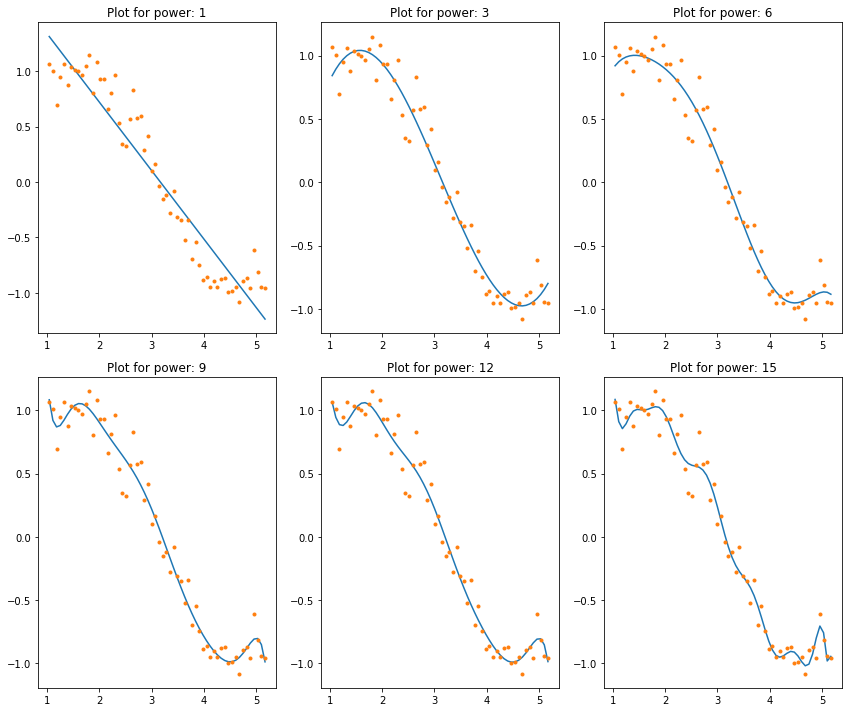
- Unusual to use powers greater than 3 or 4.  


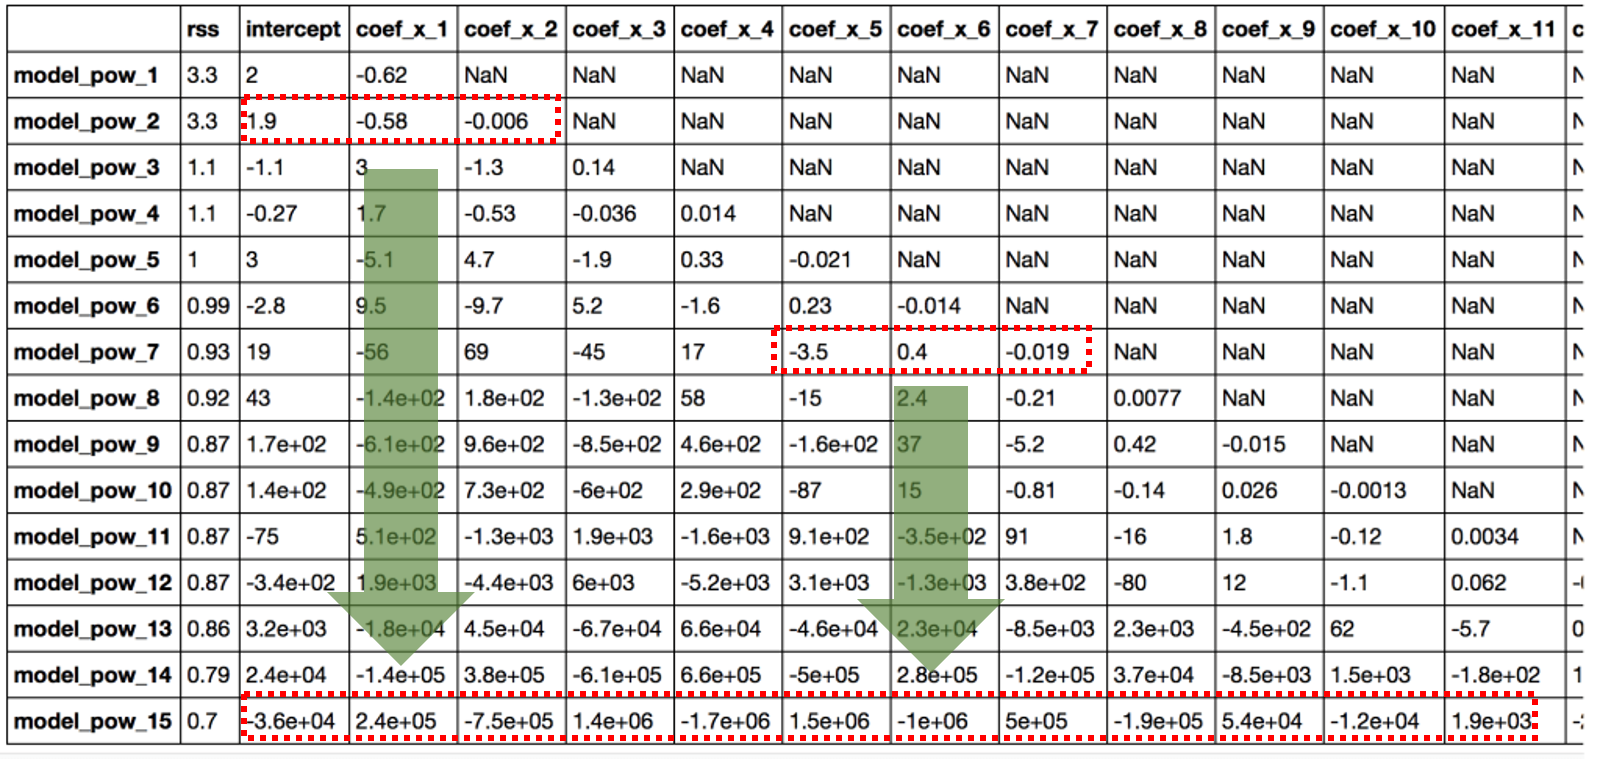
- It is clearly evident that the size of coefficients increase exponentially with increase in model complexity. 

- What does a large coefficient signify? 

- What happens when coefficients become too large?

- Putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity.

## 3. Bias-Variance Tradeoff

In the context of Supervised Learning
#### **Underfitting** happens when a model is unable to capture the underlying pattern of the data. These models usually have high bias and low variance. 

**Why would this occur?**

- When we have an inadequate amount of data to build an accurate model.
- Use wrong model. For example, when we try to build a linear model with a nonlinear data.

In the context of supervised learning
#### **Overfitting** happens when our model captures the noise along with the underlying pattern in data.  These models have low bias and high variance. 

**Why would this occur?**

- Overfitting occurs when we use models that are very complex. For example a Decision Tree. 
- Also occurs when we train our model a lot over noisy dataset.

### Bulls-Eye Diagram


-  The upper left square picture illustrates the ideal situation where both bias and variance are minimized.
- However in practice it is almost never the case and we must balance between the biased and unstable estimates (high variance).

<img src="https://hsto.org/files/281/108/1e9/2811081e9eda44d08f350be5a9deb564.png" width=350, height=350>  



- Why is it the case that as the model becomes more complex  the variance (dispersion) of the estimate also increases, but bias decreases?
 
- What about if the model is too simple?

## 4. Ridge and Lasso Regression
- Lasso and Ridge are two commonly used so-called regularization techniques.
<h3 align="center">Ridge Regression</h3> 

 $$ \text{cost_function_ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p m_j^2$$
 
- Performs $L_2$
 
<h3 align="center">LASSO Regression</h3> 
 
$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} )- b)^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$ 

 - Performs $L_1$


### Why Penalize the Magnitude of Coefficients?
- Shrinking the
coefficient estimates can significantly reduce their variance.
-  Depending on what type of shrinkage is performed, some of the coefficients may be estimated to be exactly zero. Hence, shrinkage methods can also perform variable selection.

## Ridge Regression

<img src= "https://upload.wikimedia.org/wikipedia/commons/a/ae/Tsubakurodake_from_Otenshodake_2002-8-22.jpg" width=400, height=400>  

In [ ]:
# Importing libraries. The same will be used throughout the article.

from matplotlib.pylab import rcParams
np.random.seed(10)

rcParams['figure.figsize'] = 6, 5

# Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60, 300, 4)])
y = np.sin(x) + np.random.normal(0, 0.15, len(x))

data = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])

plt.plot(data['x'], data['y'], '.')

In [ ]:
for i in range(2, 16):
    colname = 'x_%d' % i
    data[colname] = data['x']**i

In [ ]:
from sklearn.linear_model import Ridge


def ridge_regression(data, predictors, alpha, models_to_plot={}):
    # Fit the model
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])

    # Check if a plot is to be made for the entered alp
    if alpha in models_to_plot:
        rcParams['figure.figsize'] = 10, 10
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g' % alpha)

    # Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Initialize predictors to be set of 15 powers of x
predictors = ['x']
predictors.extend(['x_%d' % i for i in range(2, 16)])

# Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 10, 10000, 20000]

# Initialize the dataframe for storing coefficients.
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['alpha_%.2g' % alpha_ridge[i] for i in range(0, 10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15: 231, 1e-10: 232,
                  1e-4: 233, 1e-3: 234, 1e-2: 235, 1: 236}
for i in range(10):
    coef_matrix_ridge.iloc[i, ] = ridge_regression(
        data, predictors, alpha_ridge[i], models_to_plot)

### $\lambda$  can take various values:

- $\lambda$ = 0:
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
- $\lambda$ = $ \infty$:
The coefficients will be zero. Why?
- 0 < $\lambda$ < $ \infty$:
The magnitude of $\lambda$ will decide the weight given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.

- We can clearly observe that as the value of $\lambda$ increases, the model complexity reduces. 

- Though higher values of $\lambda$ reduce overfitting, significantly high values can cause underfitting as well (eg. $\lambda$ = 5). Thus $\lambda$ should be chosen wisely. 

- A widely accept technique is cross-validation, i.e. the value of $\lambda$ is iterated over a range of values and the one giving higher cross-validation score is chosen.

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

## The Lasso

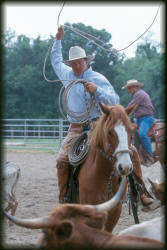

- Ridge regression has the disadvantage of including all $p$ predictors in the final model.

In [ ]:
from sklearn.linear_model import Lasso


def lasso_regression(data, predictors, alpha, models_to_plot={}):
    # Fit the model
    lassoreg = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors], data['y'])
    y_pred = lassoreg.predict(data[predictors])

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g' % alpha)

    # Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [ ]:
# Initialize predictors to all 15 powers of x
predictors = ['x']
predictors.extend(['x_%d' % i for i in range(2, 16)])

# Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]

# Initialize the dataframe to store coefficients
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['alpha_%.2g' % alpha_lasso[i] for i in range(0, 10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

# Define the models to plot
models_to_plot = {1e-10: 231, 1e-5: 232,
                  1e-4: 233, 1e-3: 234, 1e-2: 235, 1: 236}

# Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i, ] = lasso_regression(
        data, predictors, alpha_lasso[i], models_to_plot)

In [ ]:
# Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

In [ ]:
coef_matrix_lasso.apply(lambda x: sum(x.values == 0), axis=1)

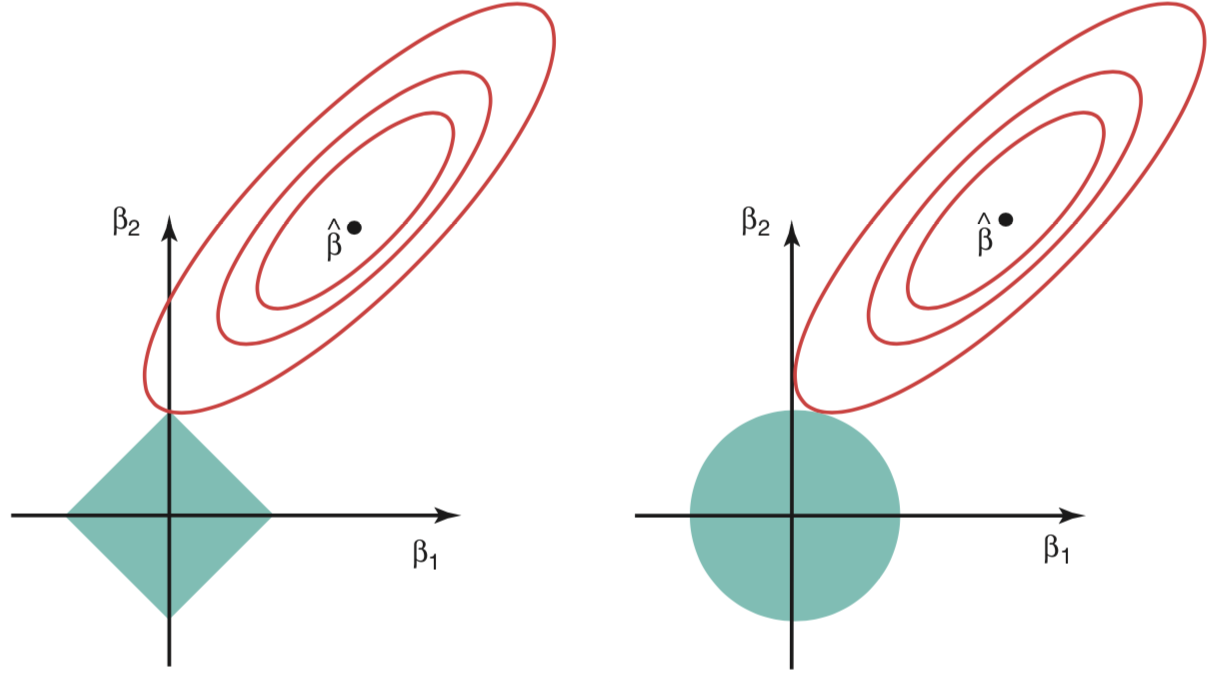

- Notice, since ridge regression has a circular constraint with no sharp points, this intersection will not generally occur on an axis, and so the ridge regression coefficient estimates will be exclusively non-zero. 
- However, the lasso constraint has corners at each of the axes, and so the ellipse will often intersect the constraint region at an axis. 

#### 1. Key Difference

- Ridge: Includes all (or none) of the features in the model.  
- major advantage: coefficient shrinkage and reducing model complexity.

- Lasso: Along with shrinking coefficients. 
- major advantage: performs feature selection. 

#### 2. Typical Use Cases
 
##### Ridge:
- Used to prevent overfitting. 
- Not very useful when we have many features.

##### Lasso:   
- Provides sparse solutions. 
- Model of choice for modelling cases where we have large number of features. 
- Sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.


## 4. AIC and BIC
### Choosing the Optimal Model

### Why New Metrics?
-  RSS and $R^2$ are related to the training error.
- Training error can be a poor estimate of the test error.
- RSS and $R^2$ are not suitable for selecting the best model among a collection of models with different numbers of predictors. Why?
- AIC and BIC indirectly estimate test error by making an adjustment to the training error to account for the bias due to overfitting.

### AIC
The formula for the AIC is given by:  
$ \text{AIC} = 2k -2\ln(\hat{L}) $

Where:
* k : length of the parameter space (i.e. the number of features)
* $\hat{L}$ : the maximum value of the likelihood function for the model

Another way to phrase the equation is:

**AIC(model) = -2 \* log-likelihood(model) + 2 \* (length of the parameter space)**

### Key
- The model with the **lowest** AIC should be selected.

### The BIC (Bayesian Information Criterion) 

$ \text{BIC} = \ln(n)k - 2\ln(\hat{L}) $

where:

* $\hat{L}$ and k are the same as the previous model
* n : the number of data points (the sample size)


- Again the **lower** your BIC, the better your model is performing.

## Classwork

For the dataset below use the techniques we went over today.
- Use Ridge and LASSO regression to improve on the model below.
- Use AIC or BIC when selecting a model your best model.

In [ ]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')

In [ ]:
df['TV_fifth']=df['TV'].pow(5)
df['radio_fifth']=df['radio'].pow(5)
df['newspaper_fifth']=df['newspaper'].pow(5)
df['TV_ten']=df['TV'].pow(10)
df['radio_ten']=df['radio'].pow(10)
df['newspaper_ten']=df['newspaper'].pow(10)

In [ ]:
est = smf.ols(formula='sales ~ TV + radio + newspaper + TV_fifth + radio_fifth+ \
newspaper_fifth+ TV_ten + radio_ten+ newspaper_ten', data=df).fit()

In [ ]:
est.summary()